Boilerplate imports

In [146]:
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.cluster import hierarchy as hrc
from scipy.stats import linregress
import scipy

import sklearn 
from sklearn.decomposition import PCA
from sklearn.cluster.bicluster import SpectralBiclustering

from sklearn.cluster import AgglomerativeClustering

text_color = 'w'
mpl.rcParams['figure.titlesize'] = 32
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['font.size'] = 14
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.labelcolor'] = text_color
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

Imports of data

In [113]:
counts = np.load('counts.npy')
deviation_matrix = np.load('numeric_deviation_matrix.npy')
dropout_deviation_matrix = np.load('dropout_deviation_matrix.npy')
header = np.load('header_backup.npy')
cell_identities = np.load('cell_identity.npy')
correlations = np.corrcoef(counts.T)
correlations[np.identity(correlations.shape[0],dtype=bool)]=0


Importing previously done clusterings

In [114]:
clustered_counts = np.load('clustered_counts.npy')
clustered_header = np.load('clustered_header.npy')

cell_clustering_indecies = np.load('cell_clustering_indecies.npy')
gene_clustering_indecies = np.load('gene_clustering_indecies.npy')

residual_gene_clusters = np.load('residual_gene_clusters.npy')

clustered_residuals = np.load('clustered_residuals.npy')


Figure 1, count frequency overall in data set

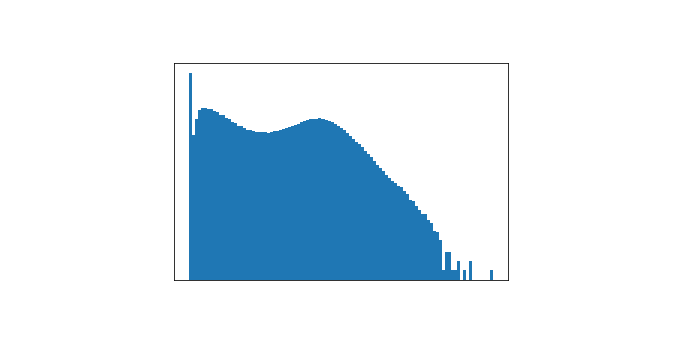

In [115]:
plt.figure("counts_frequency")
plt.hist(counts.ravel(),bins=101,log=True)
plt.title("Distribution of values in normalized expression matrix")
plt.xlabel("Log2 expression value relative to normalized library size (per Lun)")
plt.ylabel("Frequency of value (log10 scale)")
plt.show()
# plt.savefig("counts_frequency.png")


In [116]:
fig = plt.figure("Example scatter",figsize=(4,4))
ax1 = fig.add_axes([0,0,1,1])
ax1.scatter(counts[:,493],counts[:,4477],s=.3,c='b')
ax1.set_xlabel(header[493])
ax1.set_ylabel(header[4477])
# plt.show()
plt.savefig("figures/tree_scatter_example1.png",bbox_inches='tight')
plt.close()

In [117]:
fig = plt.figure("Sliced scatter",figsize=(4,5))
ax1 = fig.add_axes([0,.8,1,.2])
ax1.hist(counts[:,493],bins=np.arange(0,13,.25))
ax2 = fig.add_axes([0,0,1,.8])
ax2.scatter(counts[:,493],counts[:,4477],s=.3,c='b')
ax2.set_xlabel(header[493])
ax2.set_ylabel(header[4477])
ax2.plot([8.805,8.805],[0,13],c='black')
# plt.plot([8.805,13],[5.08,5.08],c='black')
# plt.show()
plt.savefig("figures/tree_scatter_example2.png",bbox_inches='tight')
plt.close()

In [118]:
fig = plt.figure("Twice sliced",figsize=(5,5))
ax1 = fig.add_axes([0,.8,.8,.2])
ax1.hist(counts[:,493],bins=np.arange(0,13,.25))
ax2 = fig.add_axes([.8,0,.2,.8])
ax2.hist(counts[:,4477],bins=np.arange(0,13,.25),orientation='horizontal')
ax3 = fig.add_axes([0,0,.8,.8])
ax3.scatter(counts[:,493],counts[:,4477],s=.3,c='b')
ax3.set_xlim(0,13)
ax3.set_ylim(0,13)
ax3.set_xlabel(header[493])
ax3.set_ylabel(header[4477])
ax3.plot([8.805,8.805],[0,13],c='black')
plt.plot([8.805,13],[5.08,5.08],c='black')
# plt.show()
plt.savefig("figures/tree_scatter_example3.png",bbox_inches='tight')
plt.close()

In [119]:
fig = plt.figure("Slices on other features",figsize=(4,4))
ax1 = fig.add_axes([0,0,1,1])
ax1.scatter(counts[:,493],counts[:,3890],s=.3,c='b')
ax1.set_xlim(0,13)
ax1.set_ylim(0,13)
ax1.set_xlabel(header[493])
ax1.set_ylabel(header[3890])
plt.savefig("figures/tree_scatter_example4.png",bbox_inches='tight')
plt.close()

In [120]:
fig = plt.figure("Slices on other features",figsize=(4,5))
ax1 = fig.add_axes([0,0,1,.8])
ax1.scatter(counts[:,493],counts[:,3890],s=.3,c='b')
ax1.plot([8.805,8.805],[0,13])
ax1.set_xlim(0,13)
ax1.set_ylim(0,13)
ax1.set_xlabel(header[493])
ax1.set_ylabel(header[3890])
ax2 = fig.add_axes([0,.8,1,.2])
ax2.hist(counts[:,493],bins=np.arange(0,13,.25))
plt.savefig("figures/tree_scatter_example5.png",bbox_inches='tight')
# plt.show()
plt.close()


In [121]:
index_by_cd27 = counts[:,4477] > 5.08
index_by_cox6a = counts[:,493] < 8.805

color_code = np.ones(1656)
color_code[index_by_cd27] = .9
color_code[np.logical_not(index_by_cd27)] = .2
color_code[index_by_cox6a] = .55

fig = plt.figure("Slices on other features",figsize=(5,5))
ax1 = fig.add_axes([0,0,.8,.8])
ax1.scatter(counts[:,493],counts[:,3890],s=.8,c=color_code,cmap='bwr')
# ax1.plot([8.805,8.805],[0,13])
ax1.set_xlim(0,13)
ax1.set_ylim(0,13)
ax1.set_xlabel(header[493])
ax1.set_ylabel(header[3890])
ax2 = fig.add_axes([0,.8,.8,.2])
ax2.hist(counts[:,493][index_by_cox6a],bins=np.arange(0,13,.25))
ax3 = fig.add_axes([.8,0,.2,.8])
ax3.hist(counts[:,3890][index_by_cox6a],bins=np.arange(0,13,.25),orientation='horizontal')
plt.savefig("figures/tree_scatter_example6.png",bbox_inches='tight')
plt.close()
# plt.show()

In [122]:

fig = plt.figure("cox6a vs Napsa",figsize=(4,4))
plt.xlabel(header[493])
plt.ylabel(header[3890])
plt.scatter(counts[:,493],counts[:,3890],s=.5,c='b')
plt.savefig("figures/tree_scatter_example7.png",bbox_inches='tight')
# plt.show()
plt.close()

In [123]:

fig = plt.figure("cd27 vs Napsa",figsize=(4,4))
plt.xlabel(header[4477])
plt.ylabel(header[3890])
plt.scatter(counts[:,4477],counts[:,3890],s=.5,c='b')
plt.savefig("figures/tree_scatter_example8.png",bbox_inches='tight')
# plt.show()
plt.close()

(-0.6382410891940679, 11.165540983659007)


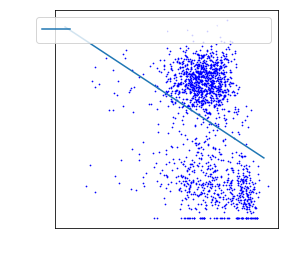

In [124]:
fig = plt.figure("cox6a vs Napsa",figsize=(4,4))
plt.xlabel(header[493])
plt.ylabel(header[3890])
plt.scatter(counts[:,493],counts[:,3890],s=.5,c='b')
slope, intercept, rvalue, pvalue, std_err = linregress(counts[:,493], y=counts[:,3890])
x = np.arange(13)
plt.plot(x,(slope*x + intercept),label = ("S: %f, R:%f" % (slope,rvalue)))
print (slope,intercept)
plt.legend()
plt.savefig("figures/tree_scatter_example9.png",bbox_inches='tight')
plt.show()
plt.close()

(0.6508682722187185, 0.6276712811156244)


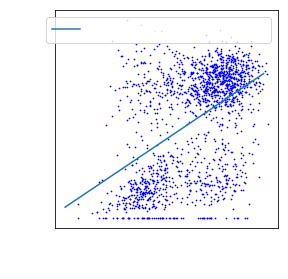

In [125]:
fig = plt.figure("Cd27 vs Napsa",figsize=(4,4))
plt.xlabel(header[4477])
plt.ylabel(header[3890])
plt.scatter(counts[:,4477],counts[:,3890],s=.5,c='b')
slope, intercept, rvalue, pvalue, std_err = linregress(counts[:,4477], y=counts[:,3890])
x = np.arange(13)
plt.plot(x,(slope*x + intercept),label = ("S: %f, R:%f" % (slope,rvalue)))
print (slope,intercept)
plt.legend()
plt.savefig("figures/tree_scatter_example10.png",bbox_inches='tight')
plt.show()
plt.close()

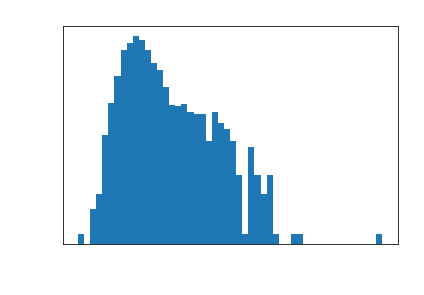

In [126]:
plt.figure("transcript_totals_hist")
plt.hist(np.sum(np.exp2(counts),axis=1),bins=50,log=True)
plt.title("Histogram of total per-cell transcript counts")
plt.xlabel("Number of total transcripts in a cell")
plt.ylabel("Frequency (log10)")
plt.show()


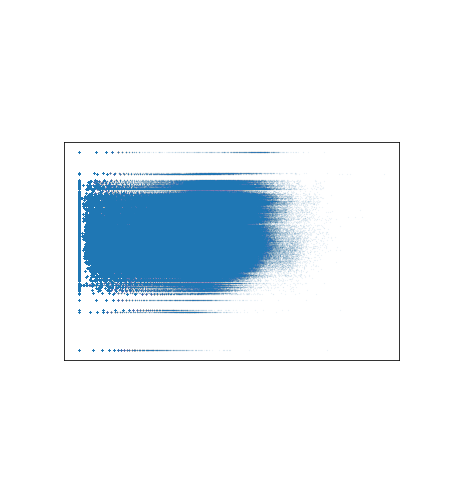

In [127]:
plt.figure("trans_size_vs_exp")
plt.scatter(counts.ravel(),np.repeat(np.sum(np.exp2(counts),axis=1),counts.shape[1]),s=.01,alpha=.3)
plt.title("Expression of each gene vs size of cell transcriptome")
plt.xlabel("Log2 gene expression value")
plt.ylabel("Total per-cell transcriptome counts (log10 scale)")
plt.yscale('log')
plt.show()
# plt.savefig('figures/trans_size_vs_exp.png')


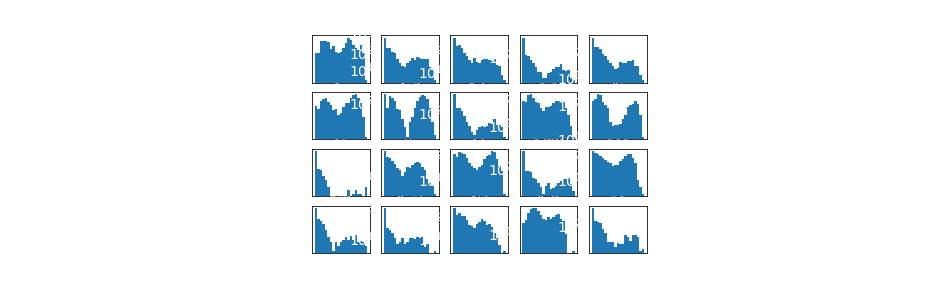

In [128]:
plt.figure("gene_histogram_gigaplex")
plt.suptitle("Set of histograms of expression values for randomly chosen genes")
plt.xlabel("Log2 gene expression values")
plt.ylabel("Frequency")
for i, pick in enumerate(np.random.randint(counts.shape[1], size=20)):
#     print pick
    plt.subplot(4,5,i+1)
    plt.title(header[pick],size=6)
    plt.hist(counts[:,pick], bins=21,log=True)
plt.show()
# plt.savefig("figures/gene_histogram_gigaplex.png",dpi=300)


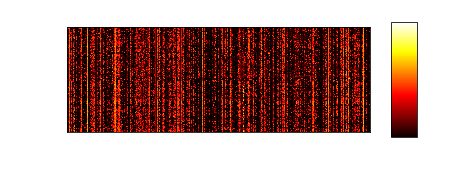

In [147]:
cfig = plt.figure("raw_expression_heatmap")
ax1 = cfig.add_axes((.1,0,.7,1))
ax2 = cfig.add_axes((.85,.3,.06,.4))
im = ax1.imshow(counts, cmap='hot')
ax1.set_xlabel("Genes")
ax1.set_ylabel("Cells")
ax1.set_title("Log2 expression values (Unordered)")
cfig.colorbar(mappable=im,cax=ax2)
# plt.show()
plt.savefig('figures/raw_expression_heatmap', dpi=600,bbox_inches='tight', transparent=True)


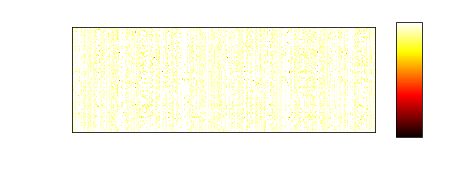

In [130]:
cfig = plt.figure("dropout_heatmap")
ax1 = cfig.add_axes((.1,0,.7,1))
ax2 = cfig.add_axes((.85,.3,.06,.4))

zero_mask = counts == 0
z_counts = scipy.stats.zscore(counts,axis=0)
z_zeros = np.zeros(counts.shape)
z_zeros[zero_mask] = z_counts[zero_mask]

im = ax1.imshow(z_zeros, cmap='hot')

ax1.set_xlabel("Genes")
ax1.set_ylabel("Cells")
ax1.set_title("Zeros in terms of Z")
cfig.colorbar(mappable=im,cax=ax2)
plt.tight_layout()
plt.savefig("figures/zero_zs.png",dpi=300)
# plt.show()

1332100


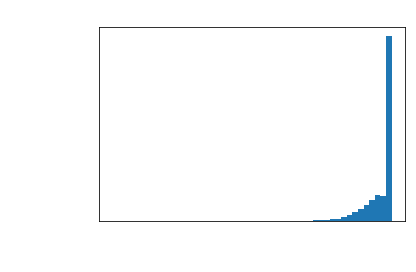

In [131]:
plt.figure()
plt.title("Histogram of Z Scores for zeros")
plt.xlabel("Z scores")
plt.ylabel("Frequency")
plt.hist(z_zeros.flatten(),bins=50)
plt.tight_layout()
plt.savefig("figures/zero_z_hist.png",dpi=300)
# plt.show()

print np.sum(z_zeros < -.5)

(1656, 4773)
1656
4773


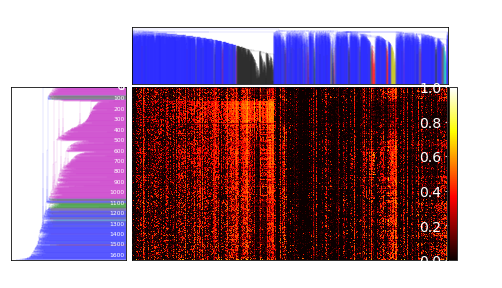

In [160]:
gene_linked = hrc.linkage(counts.T, method='average', metric='correlation')
gene_dendrogram = hrc.dendrogram(gene_linked,no_plot=True)

cell_linked = hrc.linkage(counts, method='average', metric='cosine')
clusterization = hrc.fcluster(cell_linked, criterion='inconsistent',t=.5,)
cell_dendrogram = hrc.dendrogram(cell_linked,no_plot=True)

fig = plt.figure("doubly_clustered", figsize=(8,4))
plt.suptitle("Expression of Genes In Cells, Clustered Hierarchically",color='w',size=16)
ax1 = fig.add_axes([.09,.1,.2,.6])
# display_dendrogram = hrc.dendrogram(cell_linked, p=3, truncate_mode='level',orientation='left',show_contracted=True,ax=ax1)
with plt.rc_context({'lines.linewidth':0.1}):
    display_dendrogram = hrc.dendrogram(cell_linked,orientation='left',ax=ax1)
# ax1.set_xlim(left=1.0,right=.75)
# ax1.set_xscale('log')

ax2 = fig.add_axes([.3,.71,.55,.2])
# display_dendrogram = hrc.dendrogram(gene_linked, p=3, truncate_mode='level',ax=ax2)
with plt.rc_context({'lines.linewidth':0.1}):
    display_dendrogram = hrc.dendrogram(gene_linked, ax=ax2)
# ax2.set_ylim(top=1,bottom=.75)
# ax2.set_yscale('log')

print counts.shape
print len(cell_dendrogram['leaves'])
print len(gene_dendrogram['leaves'])


ax3 = fig.add_axes([.3,.1,.55,.6])

sorted_singly = counts[np.flip(cell_dendrogram['leaves'],0)]
sorted_doubly = sorted_singly.T[gene_dendrogram['leaves']].T
im = ax3.imshow(sorted_doubly, cmap='hot', aspect='auto')
ax3.set_xticks(np.arange(0,4773,100))
ax3.set_yticks(np.arange(0,1656,100))
ax3.tick_params(labelsize=6,color='w')
# plt.xlabel("Genes")
# plt.ylabel("Cells")
ax4 = fig.add_axes([.85,.1,.05,.6])
fig.colorbar(mappable=im, fraction=.99, ax=ax4)
np.save("clustered_counts",sorted_doubly)
np.save("clustered_header",header[gene_dendrogram['leaves']])
np.save("gene_clustering_indecies", gene_dendrogram['leaves'])
np.save("cell_clustering_indecies", cell_dendrogram['leaves'])
plt.tight_layout()
plt.savefig("figures/doubly_clustered_raw_genes.png", dpi=800,transparent=True)


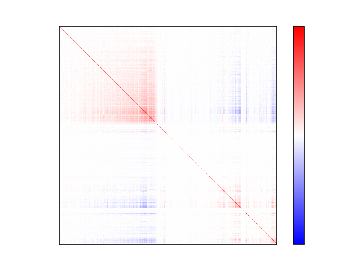

In [149]:
plt.figure("gene_covariance")
plt.title("Covariance of various genes to others")
covariance = np.cov(counts.T)
covariance = covariance[gene_dendrogram['leaves']].T[gene_dendrogram['leaves']].T
im = plt.imshow(covariance,vmin=-15,vmax=15,cmap="bwr")
plt.colorbar(im)
plt.savefig("figures/gene_covariance_simple.png",dpi=300,transparent=True,bbox_inches='tight')
# plt.show()

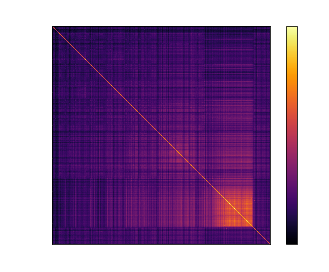

In [150]:
plt.figure("cell_covariance")
plt.title("Covariance of various cells to others")
covariance = np.cov(counts)
covariance = covariance[cell_dendrogram['leaves']].T[cell_dendrogram['leaves']].T
im = plt.imshow(covariance,cmap="inferno")
plt.colorbar(im)
plt.savefig("figures/cell_covariance_simple.png",dpi=300,transparent=True,bbox_inches='tight')
# plt.show()

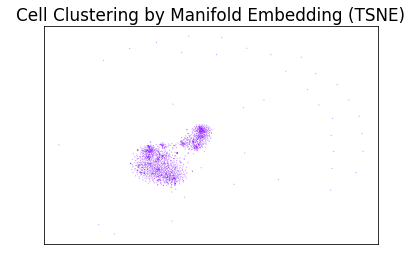

In [197]:
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
import hdbscan
from scipy.spatial.distance import pdist, squareform

plt.figure("cell_tsne_naive")
plt.title("Cell Clustering by Manifold Embedding (TSNE)",color='black')
model = TSNE(n_components=2, learning_rate=120, metric='correlation')
# model = MDS(n_components=2,metric='correlation')
clustering_model = hdbscan.HDBSCAN(min_sample_size=2,min_cluster_size=10,metric="precomputed")
clustering_distances = squareform(pdist(counts,metric='correlation'))
cluster_assignments = clustering_model.fit_predict(clustering_distances)
embedding = model.fit_transform(counts)
plt.scatter(embedding[:,0],embedding[:,1],s=.01,marker='x',c=cluster_assignments,cmap='rainbow')
plt.savefig("./figures/cell_naive_tsne.png",frameon=False,dpi=300)

0
200
400
600
800
1000
1200
1400
1600
[0.47694323256195426, 0.4552242210402546, 0.467304739776198, 0.4713380209229628, 0.49792267256878653, 0.4657113354715229, 0.48386589042176525, 0.4647627487412793, 0.5311835056021352, 0.5326090810485306]


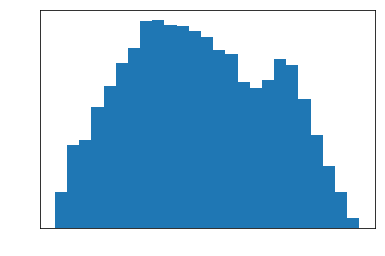

In [135]:
from scipy.stats import pearsonr

rs = []

for i in range(sorted_doubly.shape[0]-1):
    if i%200 == 0:
        print i
    rs.append(pearsonr(sorted_doubly[i],sorted_doubly[i+1])[0])

print rs[:10]
    
plt.figure()
plt.hist(rs,bins=25,log=True)
plt.show()

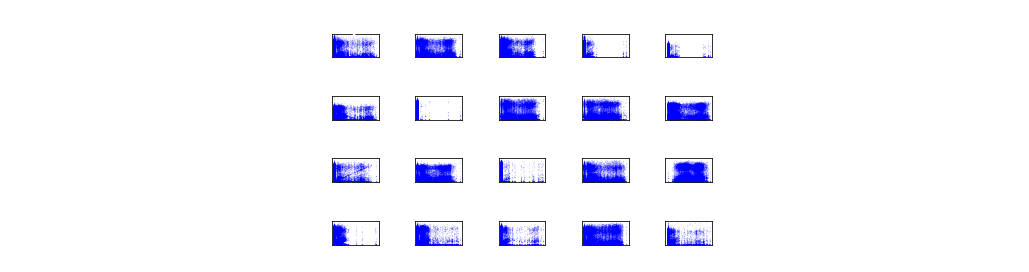

In [136]:
fig = plt.figure("gene_scatter_gigaplex")
plt.suptitle("Set of scatter plots of expression values for randomly chosen gene pairs")
plt.xlabel("Log2 gene expression values")
plt.ylabel("Frequency")
for i, pick1 in enumerate(np.random.randint(counts.shape[1], size=20)):
    for j, pick2 in enumerate(np.random.randint(counts.shape[1], size=20)):
        plt.subplot(4,5,i+1)
        plt.xlabel(header[pick1],size=6)
        plt.ylabel(header[pick2],size=6)
        plt.xticks(np.arange(0,14,2),size=3)
        plt.yticks(np.arange(2,10,2),size=3)
        plt.scatter(counts[:,pick1],counts[:,pick2],marker='x',s=.1,alpha=.1,c='b')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
# plt.savefig("figures/gene_scatter_gigaplex.png",dpi=500)


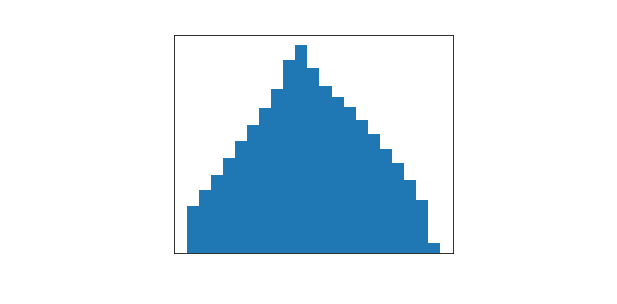

In [137]:
plt.figure("correlation_histogram",figsize=(5,4))
plt.suptitle("Frequencies of correlations between genes")
plt.subplot(111)
plt.hist(correlations.ravel(),bins=21,log=True)
plt.xlabel("Pearson correlation value, gene-gene comparison")
plt.ylabel("Frequency (log10 scale)")
plt.show()
# plt.savefig("figures/correlation_histogram.png")


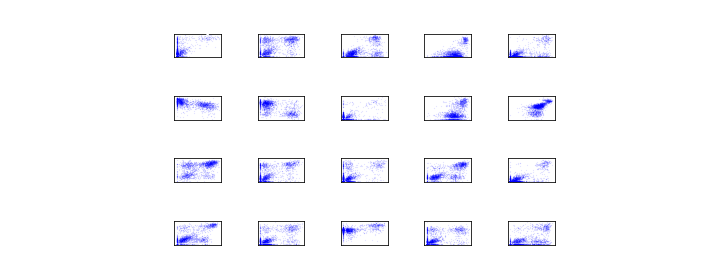

In [138]:
plt.figure("random_correlates")
plt.suptitle("Set of scatter plots for correlated gene pairs, r>.5")
plt.xlabel("Log2 gene expression values")
plt.ylabel("Frequency")
x, y = np.where(np.abs(correlations) > .5)
correlate_picks = []
for i, pick in enumerate(np.random.randint(x.shape[0], size=20)):
    correlate_picks.append(pick)
    plt.subplot(4,5,i+1)
    plt.xlabel(header[x[pick]],size=6)
    plt.ylabel(header[y[pick]],size=6)
    plt.xticks(np.arange(0,14,2),size=3)
    plt.yticks(np.arange(2,10,2),size=3)
    plt.scatter(counts[:,x[pick]],counts[:,y[pick]],marker='x',s=.1,alpha=.1,c='b')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# print x.shape
# plt.savefig("figures/correlated_scatter_gigaplex.png",dpi=500)


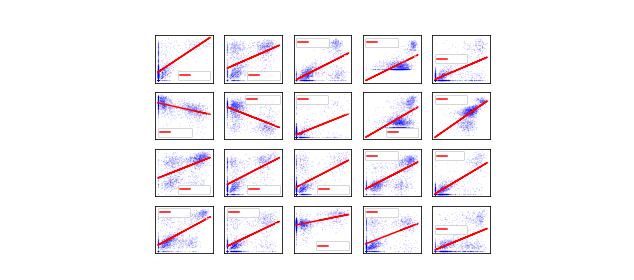

In [139]:
plt.figure()
plt.suptitle("Fitted linear regressions of correlated genes")
# plt.xlabel("Log2 gene expression values")
# plt.ylabel("Frequency")
# x, y = np.where(np.abs(correlations) > .5)
for i, pick in enumerate(correlate_picks):
    slope, intercept, rvalue, pvalue, std_err = linregress(counts[:,x[pick]], y=counts[:,y[pick]])
    plt.subplot(4,5,i+1)
    plt.xlabel(header[x[pick]],size=6)
    plt.ylabel(header[y[pick]],size=6)
    plt.xticks(np.arange(0,14,2),size=3)
    plt.yticks(np.arange(2,10,2),size=3)
    plt.scatter(counts[:,x[pick]],counts[:,y[pick]],marker='x',s=.1,alpha=.1,c='b')
    plt.plot(counts[:,x[pick]], intercept + counts[:,x[pick]]*slope, 'r', label = str(np.around(rvalue, decimals=3)))
    plt.legend(fontsize=5)
plt.show()
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# print x.shape
# plt.savefig("figures/linear_fit_gigaplex.png",dpi=500)


(1656, 4773)
(1656, 4773)
1656
4773


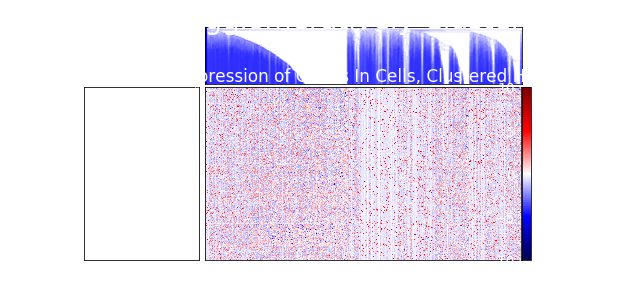

In [140]:
padded_deviation = np.zeros((deviation_matrix.shape[0],deviation_matrix.shape[1]+np.sum(np.logical_not(dropout_deviation_matrix))))
shifted_index = 0
for i in range(len(dropout_deviation_matrix)):
    if dropout_deviation_matrix[i]:
        padded_deviation[:,i] = deviation_matrix[:,i-shifted_index]
    else:
        padded_deviation[:,i] = np.zeros(padded_deviation.shape[0])
        shifted_index += 1


print padded_deviation.shape
rearranged_deviation = padded_deviation[cell_clustering_indecies]
rearranged_deviation = rearranged_deviation.T[gene_clustering_indecies].T
rearranged_deviation = np.concatenate((rearranged_deviation,np.ones((rearranged_deviation.shape[0],1))*-7.5), axis=1)
rearranged_deviation = np.concatenate((rearranged_deviation,np.ones((rearranged_deviation.shape[0],1))*7.5), axis=1)



fig = plt.figure("neighbor_residuals", figsize=(8,4))
fig.suptitle("Residuals of Agglomeratively Clustered Cells")
ax1 = fig.add_axes([.09,.1,.2,.6])
# display_dendrogram = hrc.dendrogram(cell_linked, p=3, truncate_mode='level',orientation='left',show_contracted=True,ax=ax1)
with plt.rc_context({'lines.linewidth':0.1}):
    display_dendrogram = hrc.dendrogram(cell_linked,orientation='left',ax=ax1)
ax1.set_xlim(left=1.0,right=.75)
ax1.set_xscale('log')

ax2 = fig.add_axes([.3,.71,.55,.2])
display_dendrogram = hrc.dendrogram(gene_linked, p=3, truncate_mode='level',ax=ax2)
with plt.rc_context({'lines.linewidth':0.1}):
    display_dendrogram = hrc.dendrogram(gene_linked, ax=ax2)
ax2.set_ylim(top=1,bottom=.75)
ax2.set_yscale('log')

print counts.shape
print len(cell_dendrogram['leaves'])
print len(gene_dendrogram['leaves'])


ax3 = fig.add_axes([.3,.1,.55,.6])

sorted_singly = counts[np.flip(cell_dendrogram['leaves'],0)]
sorted_doubly = sorted_singly.T[gene_dendrogram['leaves']].T
sorted_doubly = np.concatenate((sorted_doubly.T,np.ones((sorted_doubly.T.shape[0],1))*-10), axis=1)
sorted_doubly = np.concatenate((sorted_doubly,np.ones((sorted_doubly.shape[0],1))*10), axis=1)
im = ax3.imshow(rearranged_deviation, cmap='seismic', aspect='auto')
ax3.set_xticks(np.arange(0,4773,100))
ax3.set_yticks(np.arange(0,1656,100))
ax3.tick_params(labelsize=6)
plt.title("Residual Expression of Genes In Cells, Clustered Hierarchically")
plt.xlabel("Genes")
plt.ylabel("Cells")
ax4 = fig.add_axes([.85,.1,.05,.6])
ax4.set_ylim(bottom=-10,top=10)
fig.colorbar(mappable=im, fraction=.99, ax=ax4)
plt.show()
# np.save("clustered_counts",sorted_doubly)
# np.save("clustered_header",header[gene_dendrogram['leaves']])
# np.save("gene_clustering_indecies", gene_dendrogram['leaves'])
# np.save("cell_clustering_indecies", cell_dendrogram['leaves'])
# plt.savefig("figures/neighbor_cluster_deviation.png", dpi=800)


Deviation histogram

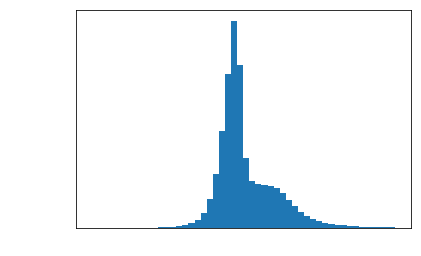

In [141]:
plt.figure()
plt.hist(rearranged_deviation.flatten(),bins=np.arange(-5.1,5.1,.2))
plt.xticks(np.arange(-5,5,))
plt.show()

1656
4769


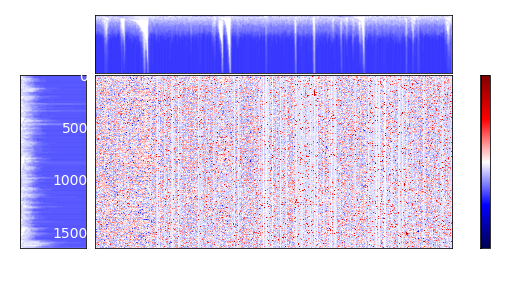

In [142]:
fig = plt.figure('clustered_residuals', figsize=(8,4))

cell_linked = hrc.linkage(deviation_matrix, method='average', metric='cosine')
clusterization = hrc.fcluster(cell_linked, criterion='inconsistent',t=.5,)
cell_dendrogram = hrc.dendrogram(cell_linked,no_plot=True)
gene_linked = hrc.linkage(deviation_matrix.T, method='average', metric='cosine')
gene_dendrogram = hrc.dendrogram(gene_linked,no_plot=True)


ax1 = fig.add_axes([.05,.1,.115,.6])
# display_dendrogram = hrc.dendrogram(cell_linked, p=3, truncate_mode='level',orientation='left',show_contracted=True,ax=ax1)
with plt.rc_context({'lines.linewidth':0.1}):
    display_dendrogram = hrc.dendrogram(cell_linked,orientation='left',ax=ax1)
ax1.set_xlim(left=1.0,right=.75)
ax1.set_xscale('log')

ax2 = fig.add_axes([.18,.71,.62,.2])
# display_dendrogram = hrc.dendrogram(gene_linked, p=3, truncate_mode='level',ax=ax2)
with plt.rc_context({'lines.linewidth':0.1}):
    display_dendrogram = hrc.dendrogram(gene_linked, ax=ax2)
ax2.set_ylim(top=1,bottom=.75)
ax2.set_yscale('log')

print len(cell_dendrogram['leaves'])
print len(gene_dendrogram['leaves'])


ax3 = fig.add_axes([.18,.1,.62,.6])

clustered_residuals = deviation_matrix.T[gene_dendrogram['leaves']]
clustered_residuals = clustered_residuals.T[cell_dendrogram['leaves']].T
clustered_residuals = np.concatenate((clustered_residuals.T,np.ones((clustered_residuals.T.shape[0],1))*-7), axis=1)
clustered_residuals = np.concatenate((clustered_residuals,np.ones((clustered_residuals.shape[0],1))*7), axis=1)
im = ax3.imshow(clustered_residuals, cmap='seismic', aspect='auto')
# plt.title("Residual Expression of Genes In Cells, Clustered Hierarchically")
# plt.xlabel("Genes")
# plt.ylabel("Cells")
ax4 = fig.add_axes([.85,.1,.05,.6])
# ax4.set_ylim(bottom=-10,top=10)
fig.colorbar(mappable=im, fraction=.99, ax=ax4)
plt.show()

# plt.savefig("figures/clustered_residuals.png",dpi=700)

# np.save('residual_gene_clusters', gene_dendrogram['leaves'])
# np.save('residual_cell_clusters', cell_dendrogram['leaves'])
np.save('figures/clustered_residuals', clustered_residuals)


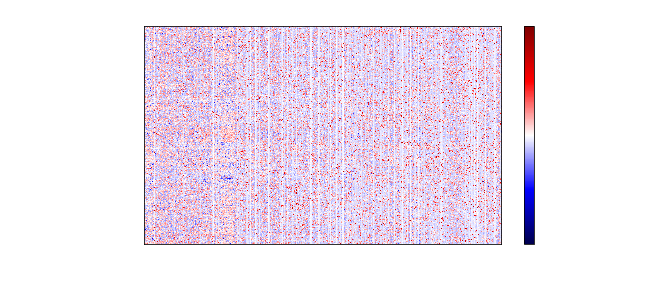

In [143]:
fig = plt.figure('biclustered', figsize=(8,4))

model = SpectralBiclustering(n_clusters=(10,6))

model.fit(padded_deviation)

row_labels,column_labels = model.row_labels_,model.column_labels_

bi_deviations = padded_deviation[np.argsort(row_labels)]
bi_deviations = bi_deviations.T[np.argsort(column_labels)].T

bi_deviations_padded = np.concatenate((bi_deviations.T,np.ones((bi_deviations.T.shape[0],1))*-7), axis=1)
bi_deviations_padded = np.concatenate((bi_deviations_padded,np.ones((bi_deviations_padded.shape[0],1))*7), axis=1).T

im = plt.imshow(bi_deviations_padded, cmap='seismic', aspect='auto')
plt.title("Residual Expression of Genes In Cells, Clustered With Spectral Biclustering")
plt.xlabel("Genes")
plt.ylabel("Cells")
fig.colorbar(mappable=im)
plt.savefig("figures/bi_residuals.png",dpi=700)
plt.show()
